In [1]:
import cv2
import matplotlib.pyplot as plt

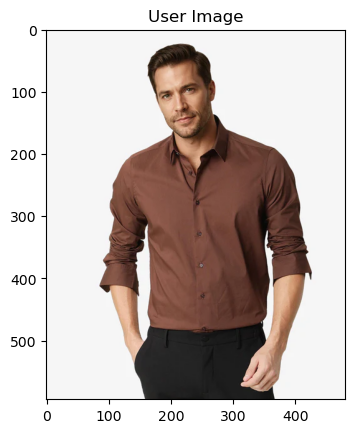

In [3]:
user_img_path = 'Cloth.jpg'
cloth_img_path = 'Mahesh.jpg'

user_img = cv2.imread(user_img_path)
cloth_img = cv2.imread(cloth_img_path)

plt.imshow(cv2.cvtColor(user_img, cv2.COLOR_BGR2RGB))
plt.title('User Image')
plt.show();

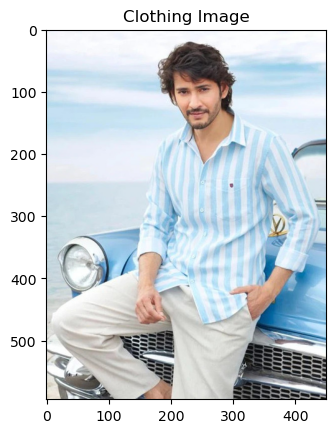

In [5]:
plt.imshow(cv2.cvtColor(cloth_img, cv2.COLOR_BGR2RGB))
plt.title('Clothing Image')
plt.show();

In [7]:
import mediapipe as mp

In [8]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)

In [11]:
user_img_rgb = cv2.cvtColor(user_img, cv2.COLOR_BGR2RGB)

result = pose.process(user_img_rgb)

landmarks = result.pose_landmarks.landmark if result.pose_landmarks else []

C:\Users\venka\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [13]:
left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]if landmarks else None
right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]if landmarks else None

In [15]:
print(f'Left Shoulder:\n{left_shoulder}')
print(f'Right Shoulder:\n{right_shoulder}')

Left Shoulder:
x: 0.747015595
y: 0.371103108
z: -0.662507355
visibility: 0.999960184

Right Shoulder:
x: 0.313515395
y: 0.384064138
z: -0.511661828
visibility: 0.99985671



In [17]:
import numpy as np

if left_shoulder and right_shoulder:

    left_shoulder_cord = np.array([left_shoulder.x, left_shoulder.y])
    right_shoulder_cord = np.array([right_shoulder.x, right_shoulder.y])
    
    shoulder_width = np.linalg.norm(left_shoulder_cord - right_shoulder_cord) * user_img.shape[1]
    
    print(f'Estimated Shoulder Width:\n{shoulder_width:.2f} pixels')

Estimated Shoulder Width:
208.17 pixels


In [73]:
cloth_orig_width = cloth_img.shape[1]
scale_factor = shoulder_width / cloth_orig_width

resized_cloth_img = cv2.resize(cloth_img, (0,0), fx=scale_factor, fy=scale_factor)
print(f'Clothing image resized by a factor:\n{scale_factor:.2f}')

Clothing image resized by a factor:
0.46


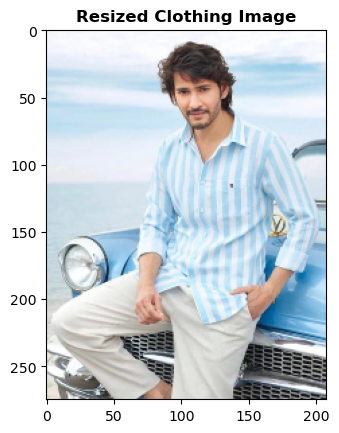

In [79]:
plt.imshow(cv2.cvtColor(resized_cloth_img, cv2.COLOR_BGR2RGB))
plt.title('Resized Clothing Image', fontweight='bold')
plt.show();

In [119]:
user_img.shape #bkgrd

(595, 480, 3)

In [173]:
cloth_img.shape #overlay

(595, 450, 3)

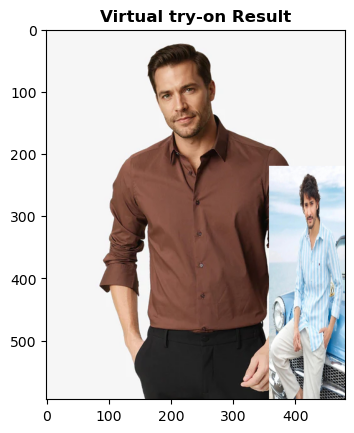

In [19]:
def overlay_image(background, overlay, x, y):

    h, w, _ = overlay.shape
    
    roi = background[y : y+h, x : x+w]
    
    resized_overlay = cv2.resize(overlay, (roi.shape[1], roi.shape[0]))
    overlay = resized_overlay
    
    
    overlay_gray = cv2.cvtColor(overlay, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(overlay_gray, 1, 255, cv2.THRESH_BINARY)
    
    mask_inv = cv2.bitwise_not(mask)
    #mask_inv = mask_inv.astype('uint8')
    #mask_inv = cv2.resize(mask_inv, (roi.shape[1], roi.shape[0]))
 
    
    background_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
    
    overlay_fg = cv2.bitwise_and(overlay, overlay, mask=mask)
    
    combined = cv2.add(background_bg, overlay_fg)
    
    background[y : y+h, x : x+w] = combined
    return background

x_pos = int(left_shoulder.x * user_img.shape[1])
y_pos = int(left_shoulder.y * user_img.shape[0])

output_img = overlay_image(user_img, cloth_img, x_pos, y_pos)

plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('Virtual try-on Result', fontweight='bold')
plt.show();